# **1. Importing important packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']
'''
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.
'''

# **2. Dataset Overview**

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  E mbarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
# (Parents/children aboard), and Fare to predict whether a passenger
#survived.

# **3. Selecting only those feautures mentioned in the problem statement.**

In [7]:
y = titanic['Survived']

In [9]:
titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin','E mbarked'],axis=1,inplace=True)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [14]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors = 3)
age_imputed =knn.fit_transform(titanic['Age'].values.reshape(-1,1))

In [16]:
age_median =titanic['Age'].fillna(titanic['Age'].median())

In [17]:
age_median

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
titanic_median = titanic.copy()
titanic_knn = titanic.copy()
titanic_knn['Age'] = age_imputed
titanic_median['Age'] = age_median

In [20]:
titanic_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [21]:
titanic_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [26]:
titanic_knn['Sex'].replace('male',1,inplace=True)
titanic_knn['Sex'].replace('female',0,inplace=True)
titanic_median['Sex'].replace('male',1,inplace=True)
titanic_median['Sex'].replace('female',0,inplace=True)

In [27]:
titanic_knn['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
std_knn_titanic = scaler.fit_transform(titanic_knn)
std_median_titanic = scaler.fit_transform(titanic_median)

# **Dataset with Age imputed by KNNimputer**

In [31]:
X_tr,X_test,Y_tr,Y_test = train_test_split(std_knn_titanic,y,test_size=0.25,random_state=43)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_tr,Y_tr,test_size=0.25,random_state=43)

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [1,2,3,5,7,9,11,13,17,20]
auc_cv =[]
auc_tr = []
for i in params:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,Y_train)
  pred_tr = [j.max() for j in model.predict_proba(X_train)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv)]
  auc_cv.append(roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(roc_auc_score(Y_train,pred_tr))
  print('train auc is {0} and cv auc is {1} for max_depth = {2}'.format(roc_auc_score(Y_cv,pred_cv),roc_auc_score(Y_train,pred_tr),i)) 

train auc is 0.22052205220522053 and cv auc is 0.2117718034124125 for max_depth = 1
train auc is 0.6357635763576357 and cv auc is 0.6534311059751206 for max_depth = 2
train auc is 0.5197269726972698 and cv auc is 0.5932975324587044 for max_depth = 3
train auc is 0.5420792079207921 and cv auc is 0.6181683774046631 for max_depth = 5
train auc is 0.5489048904890489 and cv auc is 0.6162650397661614 for max_depth = 7
train auc is 0.5636813681368138 and cv auc is 0.5407688124532664 for max_depth = 9
train auc is 0.5362286228622862 and cv auc is 0.5010111481204541 for max_depth = 11
train auc is 0.5268526852685268 and cv auc is 0.5129070083610904 for max_depth = 13
train auc is 0.5024752475247525 and cv auc is 0.48477329889198556 for max_depth = 17
train auc is 0.5024752475247525 and cv auc is 0.4831588607164707 for max_depth = 20


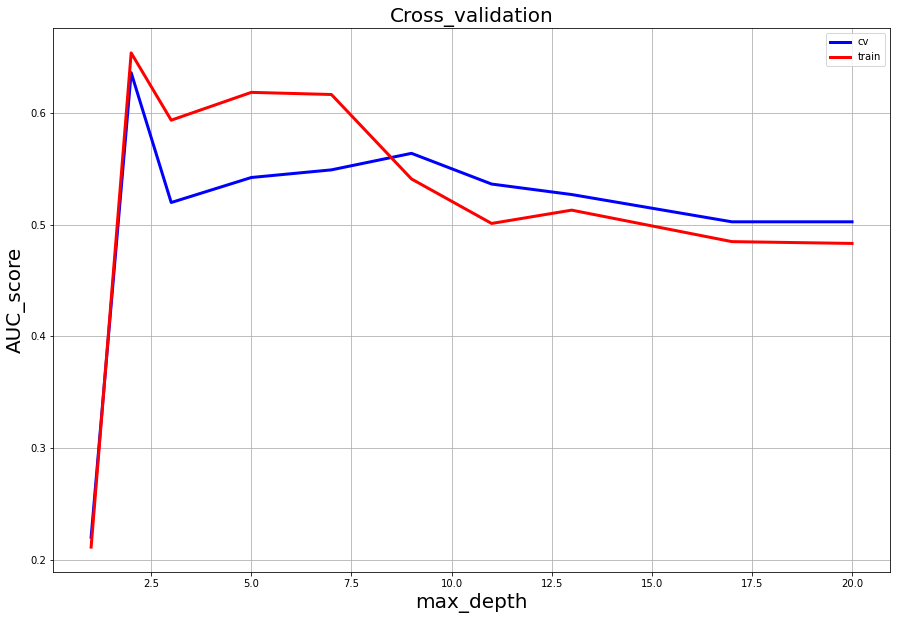

In [34]:
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('max_depth',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()

In [35]:
best_model = DecisionTreeClassifier(max_depth=7)
best_model.fit(X_train,Y_train)
pred_test = [j.max() for j in best_model.predict_proba(X_test)]
print('AUC score on test data is {0} and accuracy score is {1}'.format(roc_auc_score(Y_test,pred_test),accuracy_score(Y_test,best_model.predict(X_test))))

AUC score on test data is 0.5668350168350168 and accuracy score is 0.7713004484304933


# **Data with age imputed with median**

In [36]:
X_tr,X_test,Y_tr,Y_test = train_test_split(std_median_titanic,y,test_size=0.25,random_state=43)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_tr,Y_tr,test_size=0.25,random_state=43)

In [37]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score, accuracy_score
params = [1,2,3,5,7,9,11,13,17,20]
auc_cv =[]
auc_tr = []
for i in params:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,Y_train)
  pred_tr = [j.max() for j in model.predict_proba(X_train)]
  pred_cv = [j.max() for j in model.predict_proba(X_cv)]
  auc_cv.append(roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(roc_auc_score(Y_train,pred_tr))
  print('train auc is {0} and cv auc is {1} for max_depth = {2}'.format(roc_auc_score(Y_cv,pred_cv),roc_auc_score(Y_train,pred_tr),i)) 

train auc is 0.22052205220522053 and cv auc is 0.2117718034124125 for max_depth = 1
train auc is 0.6357635763576357 and cv auc is 0.6534311059751206 for max_depth = 2
train auc is 0.5197269726972698 and cv auc is 0.5932975324587044 for max_depth = 3
train auc is 0.5420792079207921 and cv auc is 0.6181683774046631 for max_depth = 5
train auc is 0.552055205520552 and cv auc is 0.6109288967439331 for max_depth = 7
train auc is 0.5733573357335733 and cv auc is 0.5481782339745768 for max_depth = 9
train auc is 0.5060756075607561 and cv auc is 0.5024896336075046 for max_depth = 11
train auc is 0.5175517551755175 and cv auc is 0.49166440078852564 for max_depth = 13
train auc is 0.5024752475247525 and cv auc is 0.4869485419074163 for max_depth = 17
train auc is 0.5024752475247525 and cv auc is 0.4821307185099586 for max_depth = 20


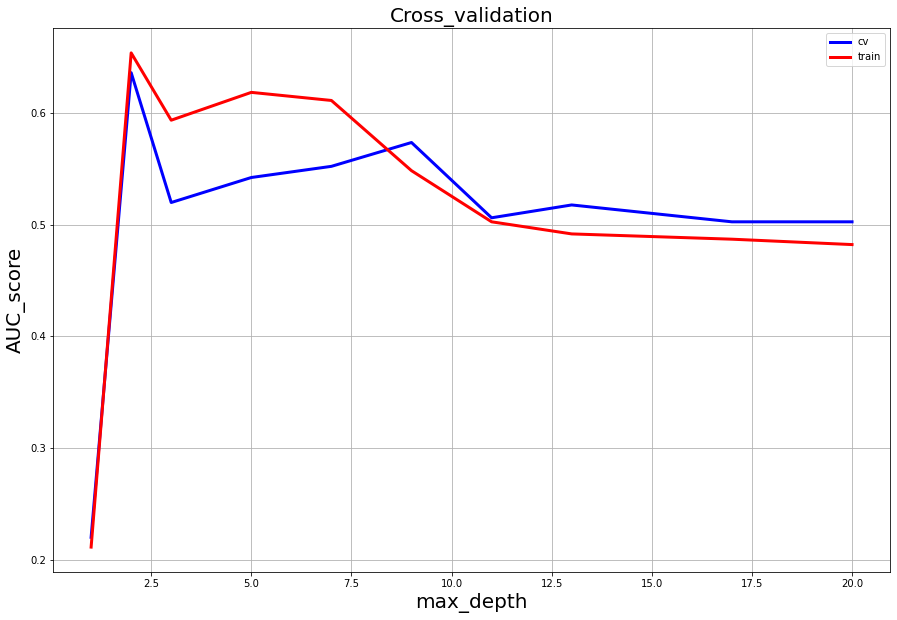

In [38]:
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('max_depth',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()

In [43]:
best_model = DecisionTreeClassifier(max_depth=5)
best_model.fit(X_train,Y_train)
pred_test = [j.max() for j in best_model.predict_proba(X_test)]
print('AUC score on test data is {0} and accuracy score is {1}'.format(roc_auc_score(Y_test,pred_test),accuracy_score(Y_test,best_model.predict(X_test))))

AUC score on test data is 0.5742424242424242 and accuracy score is 0.7623318385650224


# *Conclusion: We have better performance in AUC score when imputed with median Where as in KNNimputer AUC is 56%.*